In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib.animation import FuncAnimation

In [2]:
class GameOfLife:
    def __init__(self,X,gens):
        self.X = X
        self.gens = gens
    def neighbours(self,i,j):
        X = self.X.copy()
        directions = list(itertools.product([-1,0,1],[-1,0,1]))
        indexes = [tuple(np.add((i,j),d)) for d in directions]
        nbd = []
        for idx in indexes:
            if idx[0]<0 or idx[1]<0:
                pass
            else:
                try:
                    nbd.append(X[idx])
                except Exception:
                    pass
        nbd.remove(X[(i,j)])
        return(nbd.count(0),nbd.count(1))
    def rule(self): 
        X = self.X.copy()
        r,c = self.X.shape
        for i in range(r):
            for j in range(c):
                dead,live = self.neighbours(i,j)
                if X[(i,j)] == 0 and live == 3:
                    X[(i,j)] = 1
                elif X[(i,j)] == 1 and (live<2 or live>3):
                    X[(i,j)] = 0
                else:
                    pass
        return(X)
    def generations(self):
        generations = [self.X.copy()]
        for i in range(self.gens):
            self.X = generations[-1]
            generations.append(self.rule())
        return(generations)

In [3]:
X = GameOfLife(np.random.randint(0,2,(20,20)),50)
G = X.generations()

In [4]:
def play():
    X = G[0]
    fig = plt.figure(num="Conway's Game Of Life");
    im = plt.imshow(X, cmap = 'Greys_r')
    def animate(t):
        X = G[t]
        im.set_array(X)
        return(im) 
    anim = FuncAnimation(fig,animate,frames = len(G),interval = 1000,repeat = False,blit = True)
    plt.show()
    return(anim)

<IPython.core.display.Javascript object>


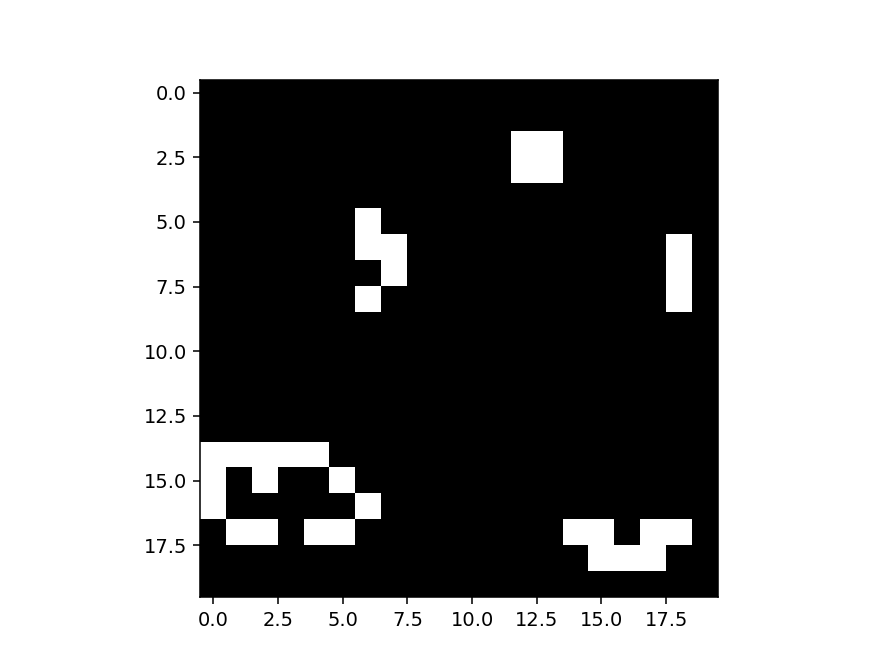

In [5]:
play()